In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_vendas_relatorio = pd.read_csv('vendas_relatorio.csv')
df_vendas_relatorio

,order_id,product_id,cust_id,product_quantity,order_date,cust_address,cust_age,effective_start_date,effective_end_date,current_ind,product_name
0,146740,614,121960,1,2019-01-24,"734 Maple St, San Francisco, CA 94016",36,1900-01-01,9999-12-31,Y,Google Phone
1,146740,614,121960,1,2019-01-24,"734 Maple St, San Francisco, CA 94016",36,1900-01-01,9999-12-31,Y,Google Phone
2,146740,614,121960,1,2019-01-24,"734 Maple St, San Francisco, CA 94016",36,1900-01-01,9999-12-31,Y,Google Phone
3,146740,614,121960,1,2019-01-24,"734 Maple St, San Francisco, CA 94016",36,1900-01-01,9999-12-31,Y,Google Phone
4,146740,614,121960,1,2019-01-24,"734 Maple St, San Francisco, CA 94016",36,1900-01-01,9999-12-31,Y,Google Phone
...,...,...,...,...,...,...,...,...,...,...,...
1345877,277548,216,122064,1,2019-10-06,"455 River St, Atlanta, GA 30301",78,1900-01-01,9999-12-31,Y,LG Dryer
1345878,277548,216,122064,1,2019-10-06,"455 River St, Atlanta, GA 30301",78,1900-01-01,9999-12-31,Y,LG Dryer
1345879,277548,216,122064,1,2019-10-06,"455 River St, Atlanta, GA 30301",78,1900-01-01,9999-12-31,Y,LG Dryer
1345880,277548,216,122064,1,2019-10-06,"455 River St, Atlanta, GA 30301",78,1900-01-01,9999-12-31,Y,LG Dryer


In [4]:
df_backup = df_vendas_relatorio.copy()

In [5]:
df_vendas_relatorio.isnull()

,order_id,product_id,cust_id,product_quantity,order_date,cust_address,cust_age,effective_start_date,effective_end_date,current_ind,product_name
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1345877,False,False,False,False,False,False,False,False,False,False,False
1345878,False,False,False,False,False,False,False,False,False,False,False
1345879,False,False,False,False,False,False,False,False,False,False,False
1345880,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df_vendas_relatorio.columns

Index(['order_id', 'product_id', 'cust_id', 'product_quantity', 'order_date',
       'cust_address', 'cust_age', 'effective_start_date',
       'effective_end_date', 'current_ind', 'product_name'],
      dtype='object')

In [7]:
def processamento_df(df_vendas_relatorio):
#    df_vendas_relatorio.head(5)
    df_vendas_relatorio = df_vendas_relatorio.drop(['cust_address','effective_start_date', 'effective_end_date', 'current_ind'], axis = 'columns')

    return df_vendas_relatorio

In [8]:
df_vendas_relatorio = processamento_df(df_vendas_relatorio)


In [9]:
df_vendas_relatorio.columns

Index(['order_id', 'product_id', 'cust_id', 'product_quantity', 'order_date',
       'cust_age', 'product_name'],
      dtype='object')

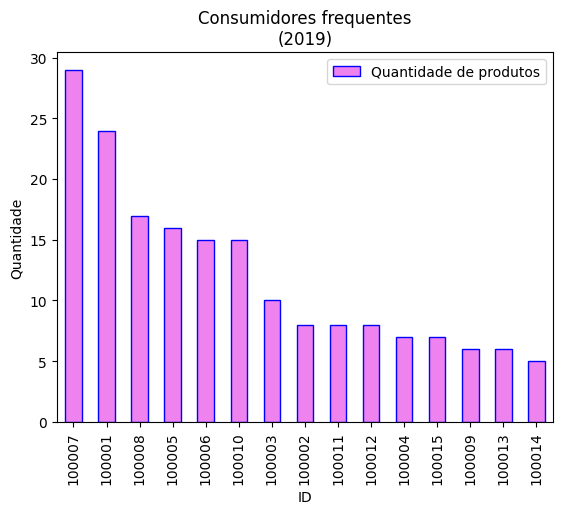

In [24]:
# clientes que mais compraram em 2019

top_clientes = df_vendas_relatorio.groupby('cust_id')['product_quantity'].sum().head(15).sort_values(ascending=False)

# Limitar o número de clientes para visualização (opcional)
top_clientes.plot(kind= "bar", edgecolor = "blue", color= "violet")
plt.title('Consumidores frequentes\n(2019)')
plt.xlabel('ID')
plt.ylabel('Quantidade')

plt.xticks(rotation=90)
plt.legend(["Quantidade de produtos"])

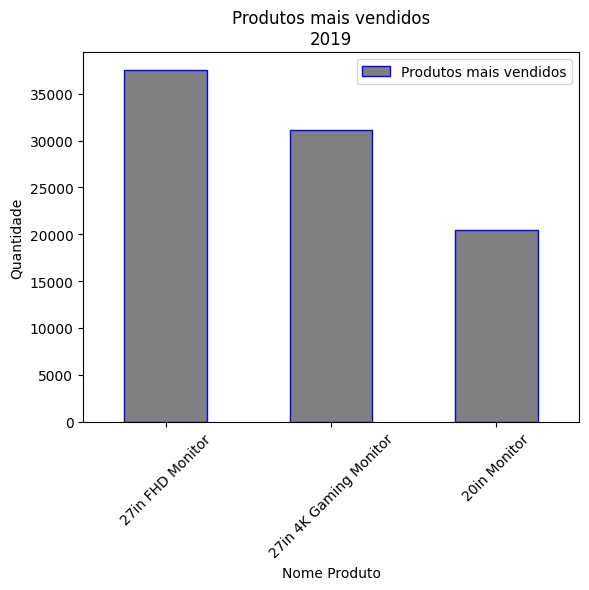

In [23]:
# Produtos mais vendidos

mais_vendidos = df_vendas_relatorio.groupby('product_name')['product_quantity'].count().head(3).sort_values(ascending=False)

mais_vendidos.plot(kind='bar', edgecolor='blue', color = 'gray')

plt.xlabel('Nome Produto')
plt.ylabel('Quantidade')
plt.title('Produtos mais vendidos\n2019')

plt.xticks(rotation=45)
plt.legend(['Produtos mais vendidos'])

In [13]:
print(mais_vendidos)

product_name
27in FHD Monitor          37535
27in 4K Gaming Monitor    31150
20in Monitor              20505
Name: product_quantity, dtype: int64


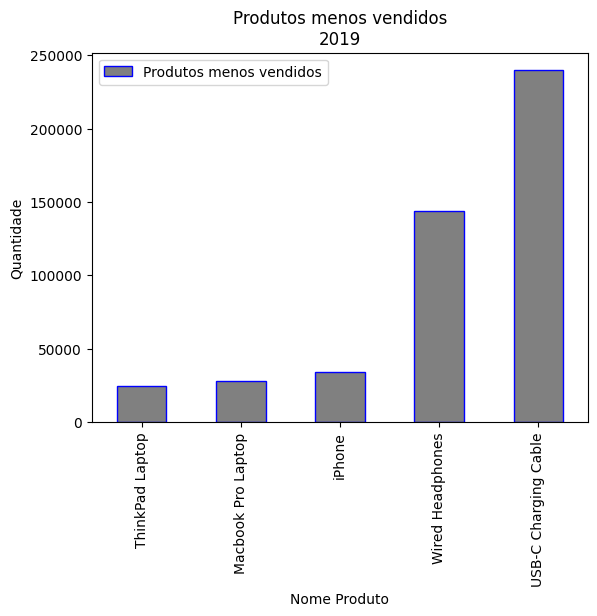

In [22]:
# Produtos menos vendidos


menos_vendidos = df_vendas_relatorio.groupby('product_name')['product_quantity'].sum().tail(5).sort_values(ascending=True)

menos_vendidos.plot(kind='bar', edgecolor='blue', color = 'gray')

plt.xlabel('Nome Produto')
plt.ylabel('Quantidade')
plt.title('Produtos menos vendidos\n2019')

plt.xticks(rotation=90)
plt.legend(["Produtos menos vendidos"])